In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt 
import numpy as np

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


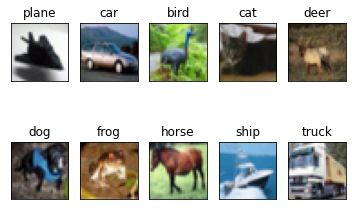

In [3]:
#show one image of each class in dataset [code from Natachas tutorials]
fig = plt.figure()
for i in range(10):
    subfig = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    subfig.set_title(classes[i])
    img = next(img for img, label in trainset if label == i)
    plt.imshow(torchvision.transforms.ToPILImage()(img))
plt.show()

I expect the classifiction on CIFAR10 to be more difficult than MNIST for multiple reasons:

1. The data is more complex, as the pictures are in color now 
2. the pictures are very low resolution, but show things with a lot of details
3. the objects themselves are more complex and detailed than in MNIST
    (and the with the low resolution very hard to recognize, even for the human eye sometimes)

In [16]:
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) #output 28x28x6 (5x5 filter, 6 filter, stride=1)
        #relu here
        self.pool = nn.MaxPool2d(2,2) #f=2 (2x2 filter), s=2 (stride) output: 14x14x6
        self.conv2 = nn.Conv2d(6, 16, 5) #f=5, s=1 output: 10x10x16 with 16 filters
        #maxpooling again here -> output 5x5x16
        # -> flatten output into 400 layer
        self.fc1 = nn.Linear(16*5*5, 120) #400 units input into 120 units FullyConnected3
        self.fc2 = nn.Linear(120, 84) #fully connected layer 4
        self.fc3 = nn.Linear(84,10) #fully connected layer 5 -> feed into softmax with 10 outputs
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
model = myCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.298
[1,  4000] loss: 2.105
[1,  6000] loss: 1.973
[1,  8000] loss: 1.817
[1, 10000] loss: 1.701
[1, 12000] loss: 1.640
[2,  2000] loss: 1.553
[2,  4000] loss: 1.524
[2,  6000] loss: 1.504
[2,  8000] loss: 1.471
[2, 10000] loss: 1.450
[2, 12000] loss: 1.450
Finished Training
